# API 활용법

- ## 크롤링 정책
- ### robots.txt : 해당 웹페이지의 크롤링 정책을 설명한 페이지
- 네이버의 크롤링 정책을 확인하려면
- naver.com/robots.txt를 보면 됨 >> 모든 유저에이전트의 정체가 디스어로우 되어있다. 우리가 아까 주가 정책을 가져간 것은 크롤링 정책에 위배된 것
- 어로우 달러표시는 관리자 모드는 허용한다 이런 뜻...
- ### 크롤링법 X : 과도한 크롤링으로 서비스에 영향을 주었을 경우, 업무 방해 혐의로 고소당할 수 있음
- ### 법정 문제 : 지적 재산권 침해, 서비스 과부화, 데이터 사용 표준에 어긋낫을 때 (개인정보 문제)
- 법적 문제를 피하기 위한 가장 좋은 방법은? API를 사용하면 된다. 프로그램적으로 내가 가지고 있는 데이터를 가져가라 >> 서비스를 제공하는 업체에서 데이터를 제공하기 위해 만들어놓은 것
- ### API 사용 : 데이터를 가지고 있는 업체에서 데이터를 가져갈 수 있도록 하는 서비스

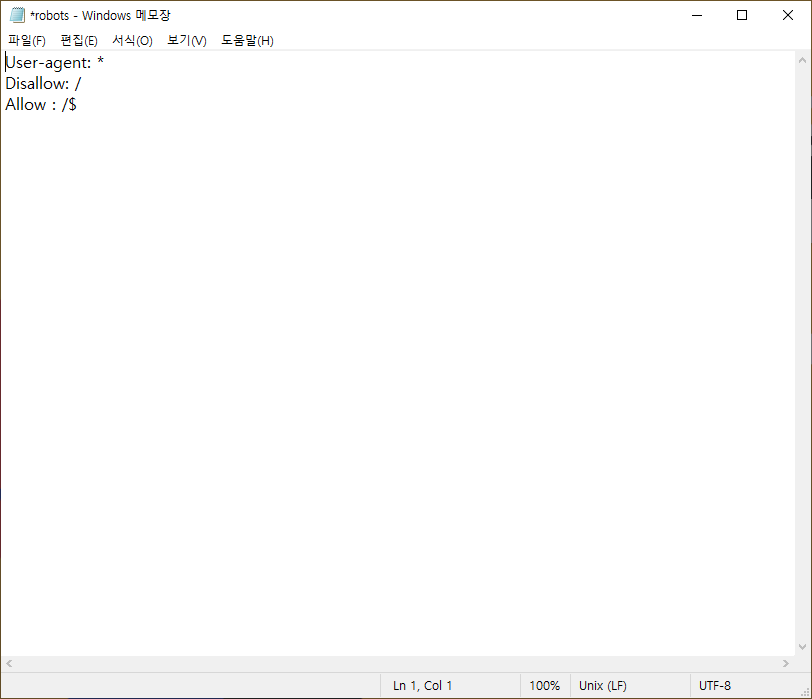

- 미국 ted 페이지 뭐는 허용안되는지 보자 
- ### 크롤링 정책이 있다
- robots.txt가 모든 사이트에 있는 것은 아니다. 개발자가 까먹었다든가...
- 이걸 어기면 무조건 법적 책임이 있는 것은 아니다 >> 크롤링법이 우리나라에 있진 않다. 
- 제한, 권고 정도만 되는 것이고 실제로 크롤링을 내가 해서 법적 책임이 생기는 경우는 과도한 크롤링으로 서비스에 영향을 주었을 경우, 업무 방해 혐의로 고소당할 수 있음

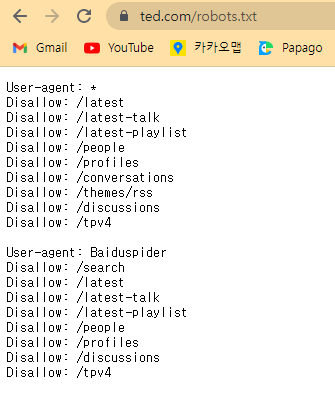

### Naver Rest API
- 파파고 번역 api
- 통합검색어 트렌드 api

In [1]:
import pandas as pd
# 워닝 메시지 따로 없어서 임포트 안함 해줘도되긴한데
import requests, json

#### 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [2]:
CLIENT_ID, CLIENT_SECRET = "pc_VCjkO7orr9xtiurHR", "CLcWcWvMB8"

#### 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`

- 1. API 문서에서 URL 사용하는 방법 먼저 찾기
- 2. request(URL, key, ko_text) 유알엘과, 키값, 한글 문자열을 가지고 요청해서 > response : json(str) 제이슨을 스트링 타입으로 응답받아옴 xml을 사용하는 경우도 있는데 굉장히 옛날 방식임 아예 없진 않음
- 3. json(str) : en_txt

### (1) API 문서 : URL

In [3]:
ko_txt = '웹 크롤링은 재미있습니다.'
#  1. API 문서 : URL, curl이라고 되어있는것
url = 'https://openapi.naver.com/v1/papago/n2mt'

# 앞에 - H 라고 되어 있는 것은 Header라고 생각하면 됨
headers = {
  'Content-Type' : 'application/json',
  'X-Naver-Client-Id' : CLIENT_ID,
  'X-Naver-Client-Secret' : CLIENT_SECRET,
}

# -d 는 데이터, 데이터 설정해 줘야 함 (쿼리)
params = {'source' : 'ko', 'target' : 'en', 'text': ko_txt}
# ko -> en 한국어 > 영어로 번역

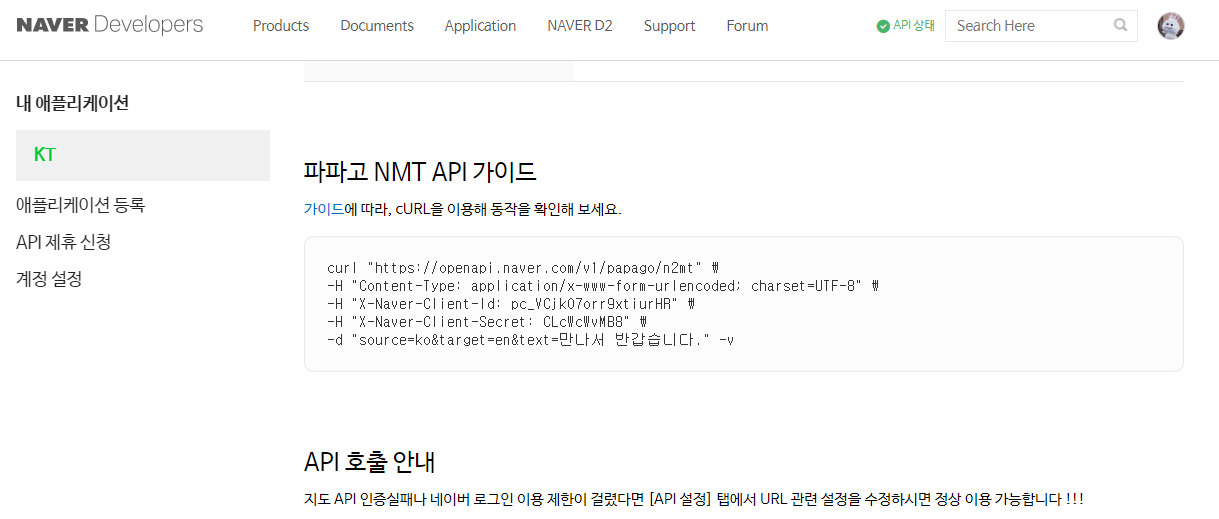

## 파란색 가이드 글자를 누르면?
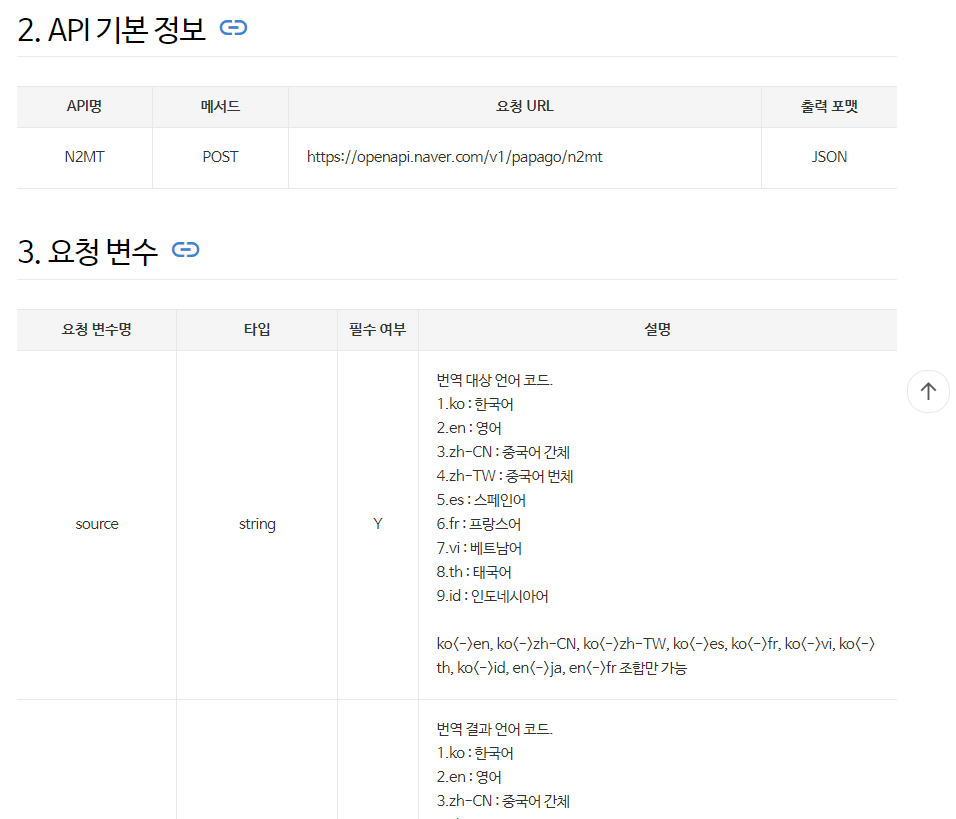
## 필수 여부 Y라고 되어있는 것을 하나라도 빼먹으면 401 에러가 뜰 것임.

### (2) request(URL, key, ko_txt) > response : json(str)

In [8]:
response = requests.post(url, params, headers = headers) # 제이슨 덤프스가 없다면?
response

<Response [400]>

In [9]:
response.text # error Message를 확인하고, 무엇이 잘못되었는지 파악

'{"errorCode":"-10001","errorMessage":"INVALID_REQUEST"}'

In [4]:
json.dumps(params)
# 제이슨 덤프스를 사용하는 이유는? 한국어가 데이터 클라이언트 사이에 주고받을 때는 한국어를 사용할 수 없음. 영문, 특수문자, 숫자를 사용해야 하는데 그래서 한국어를 바꿔서 전송해주고 그것을 해 주는 게 제이슨 덤프스
# 한국어를 쓰지 않으면 제이슨 덤프스 쓸 필요가 없음. 한글은 네트워크에서 사용할 수 없는 문자 체계이기 때문에 인코더를 해서 전송해야 함

'{"source": "ko", "target": "en", "text": "\\uc6f9 \\ud06c\\ub864\\ub9c1\\uc740 \\uc7ac\\ubbf8\\uc788\\uc2b5\\ub2c8\\ub2e4."}'

In [10]:
# 2. request(URL, key, ko_txt) > response : json(str)
response = requests.post(url, json.dumps(params), headers = headers) # post 방식이었으니 post 방식으로 전송
response

<Response [200]>

In [11]:
response.text

'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Web crawling is fun.","engineType":"N2MT","pivot":null,"dict":null,"tarDict":null,"modelVer":"Unknown"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'

In [ ]:
# 3. json(str) : en_txt

In [12]:
en_txt = response.json()['message']['result']['translatedText']
en_txt

'Web crawling is fun.'

### (4) 간단하게 함수로 만들어보자

#### 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`